### Introdução à Engenharia Biomédica (P4 - 2021/2022)
# Aula Prática #4 - Análise de Sinais em Frequência

# I. Introduction
<br>
<div class="title"style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

# <div style="color:#fbb144"> 1. Background </div>

Signals can be described in either the time or frequency domain. The frequency content of signals can be used to better characterize the physical and electrical phenomena that underlie them, as well as to perform signal processing. 

When we represent a signal in the frequency domain, we can see numerous aspects of the signal that are either difficult to see or not visible at all when we look at it in the time domain. For instance, frequency analysis is very helpful when looking for the cyclic behavior of a signal. Also, knowing the signal's frequency content can help with circuit design, filtering, and other signal-related tasks.

# <div style="color:#fbb144"> 2. Objectives</div>
* Understand what frequency-domain analysis is and why it is relevant in signal processing
* Get an intuitive idea behind the decomposition of a signal into its frequency components (Fourier Transform)
* Understand the basics of digital filtering

# II. Signal Frequency Analysis
<br>
<div style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

Signals represented in the time domain can be converted into the frequency domain using mathematical tools such as the Fourier Transform. According to the Fourier Theorem, any function *f* can be decomposed into a sum of sinusoidal functions of precise frequencies, as illustrated below:

<img src="https://i.pinimg.com/564x/a7/49/01/a7490108fd4bf64e3978a3938abcbb12.jpg"/>

Recall that sinusoidal waves can be described with three main parameters:

$$ y(t) = A sin(2\pi ft + \phi) $$

* $A$, amplitude (peak deviation from zero)
* $f$, frequency (number of cycles per time unit)
* $\phi$, phase (shift from $t=0$)

A signal's frequency-domain representation contains information on the magnitude and phase of the signal at each frequency. This information can be stored using complex numbers: the magnitude indicates how strong the frequency components are in comparison to other components, and the phase indicates how all of the frequency components are aligned in time.



<div style="background:#946db2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#d0b3e6;font-size:12px"> 
    To learn more about the Fourier decomposition check <a href="https://www.mathsisfun.com/calculus/fourier-series.html">this</a>.
</div>
</div>

To compute the Fourier Transform of digital signals, we use the Discrete Fourier Transform (DFT), which outputs complex coefficients associated with each frequency. The efficient implementation of the DFT algorithm is called the Fast Fourier Transform (FFT), and it is widely available in scientific computation environments, such as Python.

Let's exemplify using a 100 Hz sine wave sampled at 1000 Hz:

$$ y_1(t) = sin(2 \pi \times 100 t), t \in \left[ 0, 10 \right] s $$

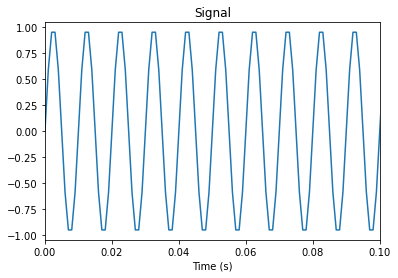

In [1]:
# Import libraries
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Create sinusoidal signal
fs = 1000                 # sampling rate (Hz)
Ts = 1/fs                 # sampling interval (s)
T = 10                    # signal duration (s)
t = np.arange(0, T, Ts)   # time vector

f1 = 100 # Hz 
y1 = np.sin(2 * np.pi * f1 * t)

# Plot signal
plt.plot(t, y1)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.xlim([0,0.1])
plt.show()

Now let's use the `fft` function from the fft submodule of *NumPy*. This function only receives the signal array:

In [2]:
Y = np.fft.fft(y1) # compute FFT 
print(Y)
print(len(Y))

[-1.72050554e-12+0.00000000e+00j  7.65807793e-12+5.07813551e-13j
 -2.31210509e-12+5.50203921e-12j ... -9.20921924e-12+2.39796301e-12j
 -2.31210509e-12-5.50203921e-12j  7.65807793e-12-5.07813551e-13j]
10000


To be able to plot the signal's frequency spectrum, we need to associate each FFT coefficient to a specific frequency. To do this, we only need to know the maximum frequency that the DFT covers and its frequency resolution:

* Maximum frequency = Nyquist frequency = $fs/2$
* Frequency resolution = $fs/N$

, where $fs$ is the sampling frequency and $N$ the number of samples of the signal.

Note that because of the Fourier Transform formulation with complex numbers, the spectrum includes negative frequencies. We can select the positive part of the frequency range (i.e., one-sided FFT):

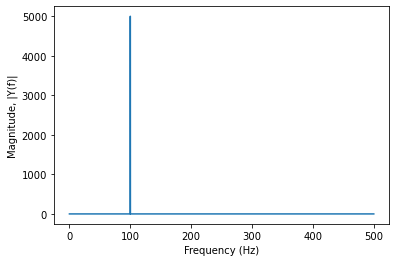

In [3]:
N = int(T*fs)                     # signal size (samples)
freq = np.arange(0, fs/2, fs/N)   # positive frequency axis (one-sided)
Y = np.fft.fft(y1)              
Y = Y[0:int(N/2)]                 # select positive-frequency coefficients

plt.plot(freq, abs(Y))            # plot the magnitude of the complex coefficients
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude, |Y(f)|')
plt.show()

As expected, we can notice a peak at the sinusoid's frequency!

Note we can only see the positive frequency axis. Also, the amplitude values are still not normalized by the signal size. We can use the function `fftfreq` to obtain the frequency axis, and divide the FFT coefficients by the signal size to perform the normalization:

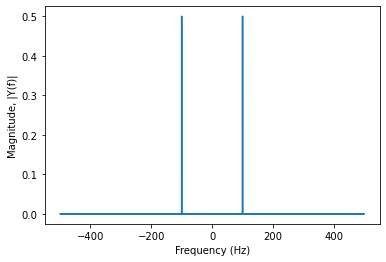

In [4]:
N = int(T*fs) 
freq = np.fft.fftfreq(N, Ts) # double-sided frequency axis
Y = np.fft.fft(y1)
Y = Y/N # normalization

plt.plot(freq, abs(Y))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude, |Y(f)|')
plt.show()

To facilitate the readability of this notebook, let's first define a function that performs the FFT computation and creates a plot of the frequency spectrum:

In [5]:
def plot_spectrum(y, fs):
    
    # FFT
    Ts = 1/fs                    # sampling period
    N = len(y)                   # signal size
    freq = np.fft.fftfreq(N, Ts) # double-sided frequency axis
    Y = np.fft.fft(y)            # compute fft
    Y = Y/N                      # normalization     
    
    # Plot fft magnitude
    plt.plot(freq, abs(Y), 'r')  # plot the FFT coefficients magnitude
    plt.title('Amplitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude, |Y(f)|')
    plt.xlim([0, fs/2])         # plot the positive frequencies

Now, let's try to plot the spectrum of another sinusoid, with a different frequency and including phase:

$$ y_2(t) = sin(2 \pi \times 200 t + \frac{\pi}{4}), t \in \left[ 0, 10 \right] s $$

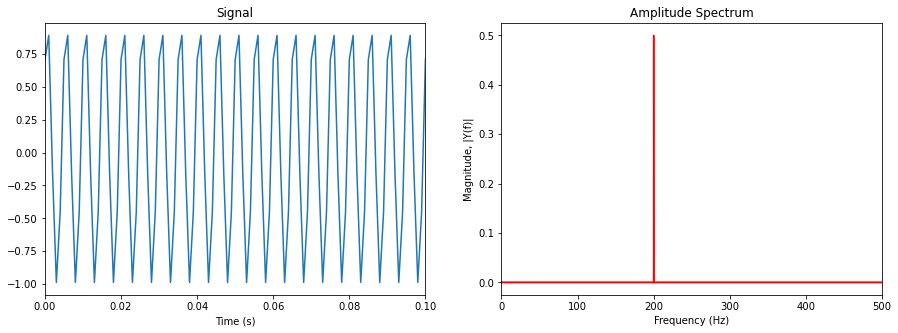

In [6]:
# Create sinusoidal signal
fs = 1000
T = 10
t = np.arange(0, T, 1/fs)
f2 = 200 # Hz
y2 = np.sin(2 * np.pi * f2 * t + np.pi/4)

# Plot signal and spectrum side by side
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(t, y2)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.xlim([0,0.1])

plt.subplot(1,2,2)
plot_spectrum(y2, fs)

plt.show()

Note that the spectrum peak corresponds to the sinusoid's frequency, and the phase does not interfere with the FFT's magnitude spectrum.

Now let's try to plot the sum of the previous sinusoids and check its frequency content:

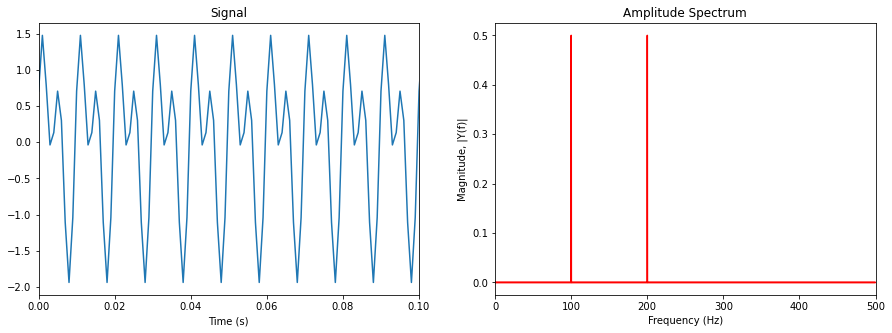

In [7]:
y3 = y1 + y2

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(t, y3)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.xlim([0,0.1])

plt.subplot(1,2,2)
plot_spectrum(y3, fs)

Altough the signal is not sinusoidal, it can be decomposed into the sum of two sinusoids of precise frequency, as represented by the spectrum. Note that it is also possible to reconstruct the original signal using the FFT coefficients.

<div style="background:#946db2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; "> Explore </span> <br>
  <div style="background:#d0b3e6;font-size:12px"> 
    To learn more about the Discrete Fourier Transform check <a href="https://www.dsprelated.com/freebooks/mdft/">this</a>.
</div>
</div>

#### EXERCISE:

1. Plot the signal $y_4$ and visualize its frequency content with the FFT using the `plot_spectrum` function:

$$ y_4(t) = 10\cos(2 \pi \times 50 t) + 5 \sin(2 \pi \times 25 t) , t \in \left[ 0, 10 \right] s $$

Comment on the differences in magnitude of the frequency components.

2. Load the `ecg_normal.csv` file in the `resources` folder to a NumPy array and plot the first 3 seconds of the signal using real time units. The signal was acquired using a 1000 Hz sampling frequency.

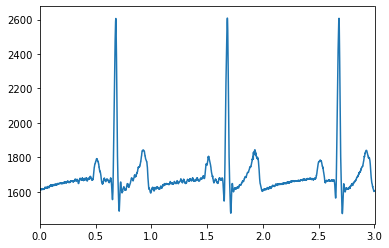

3. Adapt the `plot_spectrum` function to plot the phase of the complex coefficients, instead of their magnitude. Rename the function as `plot_phase`.

*Hint: use the `np.angle()` function.*

4. Use a 2x1 grid subplot to show both the FFT magnitude and phase of the `ecg_normal.csv` file side by side. Adjust the axes to better see the frequency components.

# III. Signal Digital Filtering
<br>
<div class="title"style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

Real-world signals are often corrupted with noise and artifacts. Knowledge of the frequency properties of such sources can help us design filters that can suppress their effect.

We can classify filters based on the range of frequencies they allow or reject (i.e., the frequency response):

* **Low-pass**: passes frequencies below a given cutoff frequency $f_c$, blocks frequencies above $f_c$.

* **High-pass**: passes frequencies above $f_c$, blocks frequencies below $f_c$.

* **Band-pass**: passes frequencies within a two-frequency range $f_L$ and $f_H$, rejects the rest 

* **Band-stop**: blocks frequencies within a two-frequency range $f_L$ and $f_H$

<br>
<img src="https://pysdr.org/_images/filter_types.png" style="width:70%"/>
<br>
<a href="https://pysdr.org/content/filters.html">Reference</a>


Let's see an example with an ECG recording corrupted with powerline interference:

In [ ]:
# Acquisition details
fs = 1000 # Hz
vref = 3.3 # V
gain = 1100

# Load file and convert to real units
ecg_50Hz = np.loadtxt('resources/ecg_50Hz.csv')
ecg_50Hz = (ecg_50Hz/2**12 - 1/2)*vref*1000/gain # mV
t = np.arange(0,len(ecg_50Hz)/fs,1/fs)

# Plot
plt.figure(figsize=(10, 3))
plt.plot(t, ecg_50Hz)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.xlim([0,3])
plt.show()

Let's compute the FFT of this signal to check its frequency content:

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(t, ecg_50Hz)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.xlim([0,1])

plt.subplot(1,2,2)
plot_spectrum(ecg_50Hz, fs)
plt.xlim([0,100])
plt.ylim([0,0.2])
plt.show()

#### DISCUSSION

This ECG signal has been cleary affected by a strong 50 Hz interference, the standard frequency in Europe's electricity grid. How can we design a digital filter to supress this component and enhance signal quality? Can you think of any filter that would do this without damaging the ECG's morphological features?

# III. BioSignal Processing in Python (BioSPPy) Toolbox
<br>
<div class="title"style="width:100%; background:linear-gradient(to right,#FDC86E,#fbb144);font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

<img src="https://raw.githubusercontent.com/PIA-Group/BioSPPy/master/docs/logo/logo_400.png"/>

*BioSPPy* is a toolbox written in Python for **biosignal processing**. It covers filtering, frequency analysis of the raw signal acquired, clustering and biometrics. This package supports various biosignals, namely, Blood Volume Pulse (BVP), Eletrocardiogram (ECG), Eletrodermal Activity (EDA), Eletroencephalogram (EEG), Eletromyogram (EMG) and Respiration (RESP).

To install the *BioSPPy* package in your Python environment, run the following:

*Note: accept to install any packages that may be required.*

In [ ]:
!pip install biosppy

We will start by exploring the `Tools` module, which includes, for example, filter design and power spectral density

# <div style="color:#fbb144"> 1. Filtering with BioSPPy</div>


Let's try to filter the previous ECG signal using a low-pass filter with cutoff frequency $f_c$ = 40 Hz that looks like this:

<img src="resources/FIR_filter.png"/>

Using the `filter_signal` function from the `signals.tools` module we can easily implement this filter. We will use a Finite Impulse Response (FIR) filter, widely used in digital signal processing. The following filter types are available in BioSPPy:

* Finite Impulse Response filter ('FIR');
* Butterworth filter ('butter');
* Chebyshev filters ('cheby1', 'cheby2');
* Elliptic filter ('ellip');
* Bessel filter ('bessel')

In [ ]:
# Import library
import biosppy as bp

# Define filter parameters
ftype = 'FIR'
band = 'lowpass'     
order = int(0.3*fs)  # number of previous inputs used to calculate the current output
fc = 40              # cutoff frequency (Hz)

# Perform filtering
ecg_filtered, _, _ = bp.signals.tools.filter_signal(ecg_50Hz, ftype, band, order, fc, fs)

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(t, ecg_filtered)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.xlim([0,3])

plt.subplot(1,2,2)
plot_spectrum(ecg_filtered, fs)
plt.xlim([0,100])
plt.ylim([0,0.2])
plt.show()

The 50 Hz interference was successfully suppressed from the ECG signal! ECG morphology is now clearer.

#### EXERCISE:

1. In the United States the power line frequency is 60 Hz, thus ECG recordings can be affected by this frequency interference. Take the `ecg_60Hz.csv` file ($f_s$=1000 Hz) and filter the signal using BioSPPy.

2. ECG recordings can also suffer from baseline wander. Plot the `ecg_bsw.csv` file ($f_s$=1000 Hz), describe the artifact behaviour and apply a filter to suppress its effect.

# <div style="color:#fbb144"> 2. Power Spectral Density (PSD) with BioSPPy</div>

We can also use BioSPPy to visualize the Power Spectral Density (PSD) of biosignals, that describes how the power of the signal is distributed over frequency. Let's exemplify using the Welch's method for computing the PSD.

* ECG signal corrupted with 50 Hz

In [ ]:
# Compute PSD
freqs, power = bp.signals.tools.welch_spectrum(ecg_50Hz, fs)

# Plot
plt.plot(freqs, power)
plt.title('Power Spectral Density - Welch Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/frequency (dB/Hz)')
plt.grid()
plt.show()

* Filtered ECG signal

In [ ]:
# Compute PSD
freqs, power = bp.signals.tools.welch_spectrum(ecg_filtered, fs)

# Plot
plt.plot(freqs, power)
plt.title('Power Spectral Density - Welch Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/frequency (dB/Hz)')
plt.grid()
plt.show()

<tr>
<td> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IT.png?raw=true" alt="Drawing" style="width:200px"/> </td>

<td> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IST.png?raw=true" alt="Drawing"
style="width:200px"/> </td>
</tr>

```Contributors:  ``` Ana Fred, Hugo Plácido da Silva and Rafael Silva